In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

/Users/jungjihoon/miniforge3/envs/dl/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Califo

In [3]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['TARGET'] = boston.target

In [7]:
df.values[:,:]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

In [9]:
scaler = StandardScaler()
df.values[:,:-1] = scaler.fit_transform(df.values[:,:-1]) # TARGET values 빼고 스케일링
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,22.4
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,20.6
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,23.9
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,22.0
505,-0.415000,-0.487722,0.115738,-0.272599,0.158124,-0.362767,0.434732,-0.613246,-0.982843,-0.803212,1.176466,0.441052,-0.669058,11.9


In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [11]:
data = torch.from_numpy(df.values).float()
data.shape

torch.Size([506, 14])

In [12]:
y = data[:,-1:]
x = data[:,:-1]

print(x.shape, y.shape)

torch.Size([506, 13]) torch.Size([506, 1])


In [13]:
n_epochs = 100000
learning_rate = 1e-4
print_interval = 10000

In [14]:
model = nn.Sequential(
    nn.Linear(x.size(-1), 5),
    nn.LeakyReLU(),
    nn.Linear(5,5),
    nn.LeakyReLU(),
    nn.Linear(5,5),
    nn.LeakyReLU(),
    nn.Linear(5,5),
    nn.LeakyReLU(),
    nn.Linear(5,5),
    nn.LeakyReLU(),
    nn.Linear(5, y.size(-1))
)
model

Sequential(
  (0): Linear(in_features=13, out_features=5, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=5, out_features=5, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=5, out_features=5, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=5, out_features=5, bias=True)
  (7): LeakyReLU(negative_slope=0.01)
  (8): Linear(in_features=5, out_features=5, bias=True)
  (9): LeakyReLU(negative_slope=0.01)
  (10): Linear(in_features=5, out_features=1, bias=True)
)

In [19]:
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [20]:
for i in range(n_epochs):
    y_hat = model(x)
    loss = F.mse_loss(y_hat, y)
    
    optimizer.zero_grad()
    loss.backward()
    
    optimizer.step()
    
    if (i+1) % print_interval == 0:
        print('Epoch %d: loss =%.4e' % (i + 1, loss))

Epoch 10000: loss =4.1728e+00
Epoch 20000: loss =4.0753e+00
Epoch 30000: loss =4.0176e+00
Epoch 40000: loss =3.9594e+00
Epoch 50000: loss =3.9323e+00
Epoch 60000: loss =3.8854e+00
Epoch 70000: loss =3.8531e+00
Epoch 80000: loss =3.8407e+00
Epoch 90000: loss =3.8286e+00
Epoch 100000: loss =3.7534e+00


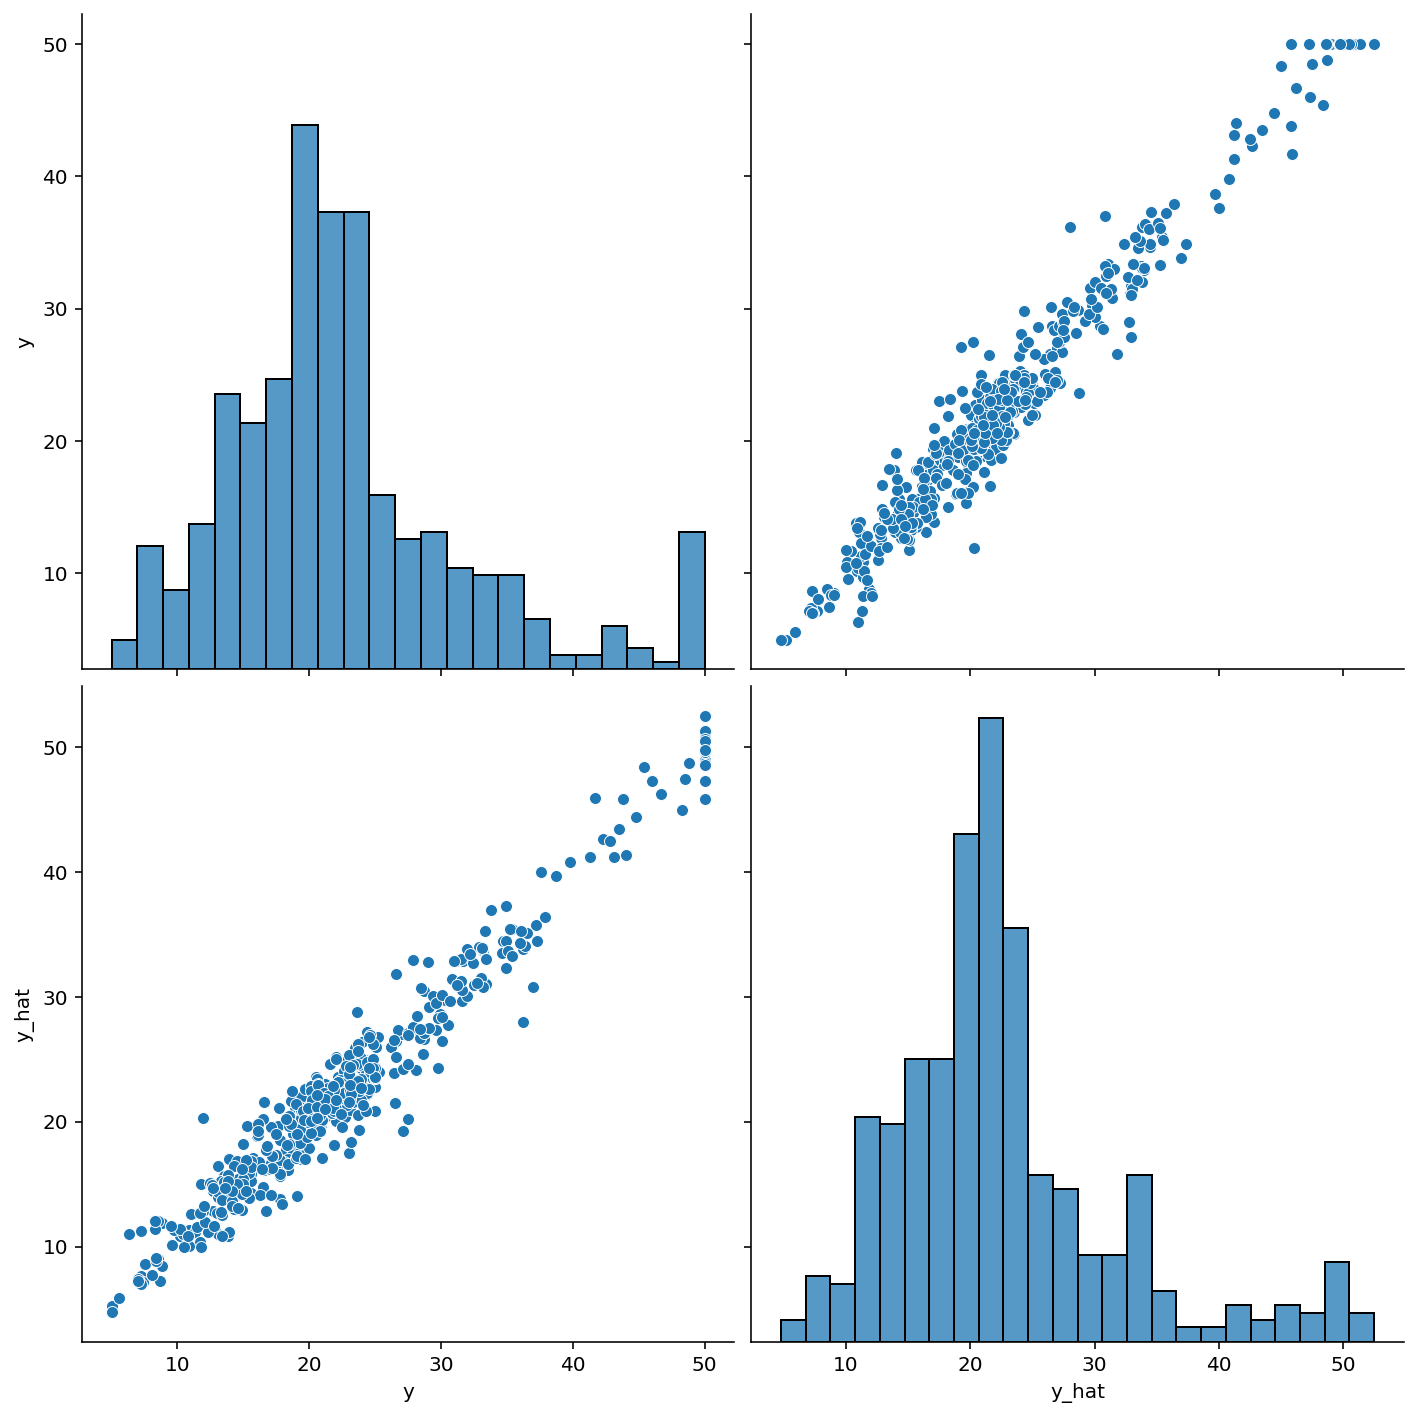

In [21]:
df = pd.DataFrame(torch.cat([y, y_hat], dim=1).detach().numpy(), columns=['y', 'y_hat'])
sns.pairplot(df, height=5)
plt.show()